# Deep (Easy) Learning

Sachin Abeywardana
* Twitter: @sachinabey
* github.com/sachinruk

In [1]:
import numpy as np
from standard_plots import *

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import theano

%matplotlib inline

Using Theano backend.


# Simple Neural Net

Zero Hidden Layer case :
![alt text](SimpleNN.png)
(http://2centsapiece.blogspot.com/2015/10/identifying-subatomic-particles-with.html?view=mosaic)

One Hidden Layer case:
![alt text](NN.png)

/Users/sachin/Documents/uniwork/PyData_Keras_Talk/standard_plots.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if x==None:


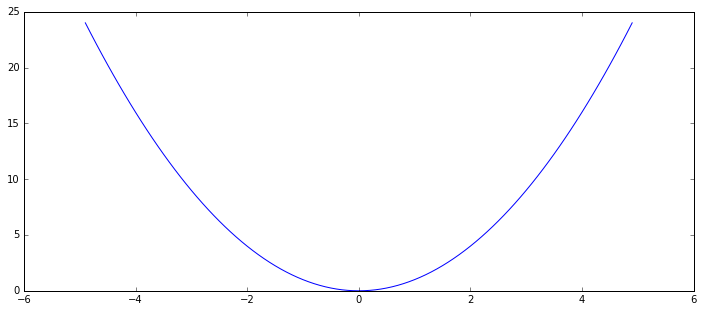

In [2]:
x = np.arange(-4.9,5,0.1)
y = x**2
plt_plot(x,y)

In [3]:
len(y)

99

Normalise the data to be between [0,1]

In [4]:
y_normalised = y/25
x_normalised = x/5

Model and fitting in Keras (0 hidden layer case)

In [6]:
theano.config.compute_test_value = "ignore"

model = Sequential()
model.add(Dense(1, input_dim=1))
model.compile(optimizer='adagrad', loss='mse')
model.fit(x_normalised, y_normalised, nb_epoch=5, batch_size=32)

Epoch 1/5
99/99 [==============================] - 0s - loss: 0.3840     
Epoch 2/5
99/99 [==============================] - 0s - loss: 0.3575     
Epoch 3/5
99/99 [==============================] - 0s - loss: 0.3479     
Epoch 4/5
99/99 [==============================] - 0s - loss: 0.3398     
Epoch 5/5
99/99 [==============================] - 0s - loss: 0.3320     


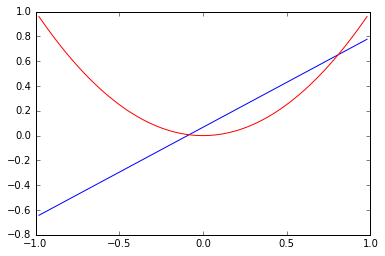

In [7]:
prediction = model.predict(x_normalised)

plt.plot(x_normalised,prediction)
plt.plot(x_normalised,y_normalised,'r')
plt.show()

Add a hidden layer with two nodes

In [10]:
theano.config.compute_test_value = "ignore"

model = Sequential()
model.add(Dense(2, input_dim=1,activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adagrad', loss='mse')
model.fit(x_normalised, y_normalised, nb_epoch=1000, batch_size=32,verbose=0)

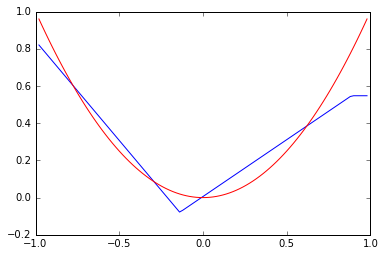

In [11]:
prediction = model.predict(x_normalised)

plt.plot(x_normalised,prediction)
plt.plot(x_normalised,y_normalised,'r')
plt.show()

Increase the nodes in that layer to 32

In [14]:
theano.config.compute_test_value = "ignore"

model = Sequential()
model.add(Dense(32, input_dim=1,activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adagrad', loss='mse')
model.fit(x_normalised, y_normalised, nb_epoch=100, batch_size=32,verbose=0)

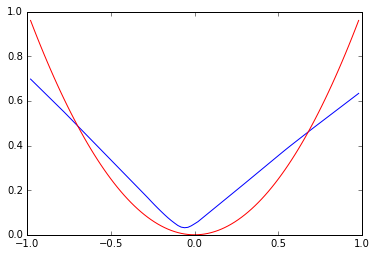

In [15]:
prediction = model.predict(x_normalised)

plt.plot(x_normalised,prediction)
plt.plot(x_normalised,y_normalised,'r')
plt.show()

Add another layer with 32 nodes

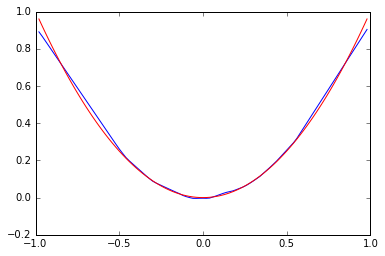

In [16]:
theano.config.compute_test_value = "ignore"

model = Sequential()
model.add(Dense(32, input_dim=1,activation="relu"))
model.add(Dense(32, input_dim=1,activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adagrad', loss='mse')
model.fit(x_normalised, y_normalised, nb_epoch=100, batch_size=32,verbose=0)

prediction = model.predict(x_normalised)

plt.plot(x_normalised,prediction)
plt.plot(x_normalised,y_normalised,'r')
plt.show()

Similar code in Tensorflow:

In [17]:
import tensorflow as tf

In [18]:
graph = tf.Graph()
with graph.as_default():

    # Save/ allocate space for data
    tf_train_dataset = tf.constant(train_dataset[:train_subset, :])
    tf_train_labels = tf.constant(train_labels[:train_subset])
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Initialise the weights
    weights = tf.Variable(tf.truncated_normal([32, 1]))
    biases = tf.Variable(tf.zeros([num_labels]))

    # Loss function
    y_est = tf.matmul(tf_train_dataset, weights) + biases
    loss = tf.reduce_mean(tf.nn.l2_loss(y_est, tf_train_labels))

    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

    # Predictions for the training, validation, and test data.
    # These are not part of training, but merely here so that we can report
    # accuracy figures as we train.
    train_prediction = y_est
    valid_prediction = tf.matmul(tf_valid_dataset, weights) + biases
    test_prediction = tf.matmul(tf_test_dataset, weights) + biases

NameError: name 'train_dataset' is not defined

## References:

* Keras: https://keras.io/
* Basics: http://deeplearning.stanford.edu/wiki/index.php/UFLDL_Tutorial (don't spend much time here)
* Tensorflow: https://www.udacity.com/course/deep-learning--ud730
